In [4]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Loading raw data
train_identity = pd.read_csv("train_identity.csv")
train_transaction = pd.read_csv("train_transaction.csv")

FileNotFoundError: [Errno 2] File b'train_identity.csv' does not exist: b'train_identity.csv'

In [ ]:
# Checking the first 5 rows to see if the data was loaded okay 
train_identity.head()

In [ ]:
# Checking the first 5 rows to see if the data was loaded okay
train_transaction.head()

In [ ]:
# merging both the datasets using 'TransactionID'
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [6]:
# checking the head to make sure merging caused no problems
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [7]:
# checking the size of the dataset
train.shape

(590540, 434)

In [8]:
#Deleting transaction and identity datasets to release space
del train_transaction,train_identity

## Exploratory data analysis 

In [9]:
# Looking at the column names
train.columns.values

array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V6

In [10]:
# Understanding variable types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [11]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 414 columns in train dataset with missing values.


### Analyzing variables in batches of 20

In [12]:
print(train.iloc[:,0:20].info())
train.iloc[:,0:20].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 20 columns):
TransactionID     590540 non-null int64
isFraud           590540 non-null int64
TransactionDT     590540 non-null int64
TransactionAmt    590540 non-null float64
ProductCD         590540 non-null object
card1             590540 non-null int64
card2             581607 non-null float64
card3             588975 non-null float64
card4             588963 non-null object
card5             586281 non-null float64
card6             588969 non-null object
addr1             524834 non-null float64
addr2             524834 non-null float64
dist1             238269 non-null float64
dist2             37627 non-null float64
P_emaildomain     496084 non-null object
R_emaildomain     137291 non-null object
C1                590540 non-null float64
C2                590540 non-null float64
C3                590540 non-null float64
dtypes: float64(11), int64(4), object(5)
memory usage: 94.6+ MB

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0


In [13]:
#fraud percentage in the dataset
train.isFraud.mean()*100

3.4990009144173126

In [14]:
print(train.TransactionDT.unique().shape)
max(train.TransactionDT)-min(train.TransactionDT)

(573349,)


15724731

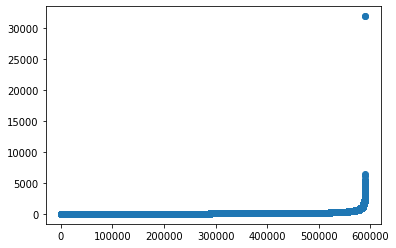

In [15]:
plt.scatter(list(range(train.shape[0])),train.sort_values('TransactionAmt').TransactionAmt)

In [16]:
train.TransactionAmt.describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [17]:
train.loc[train.TransactionAmt==31937.391,['TransactionID','isFraud','TransactionAmt','card1']]

,TransactionID,isFraud,TransactionAmt,card1
274336,3261336,0,31937.391,16075
274339,3261339,0,31937.391,16075


Text(0, 0.5, 'Transaction amount')

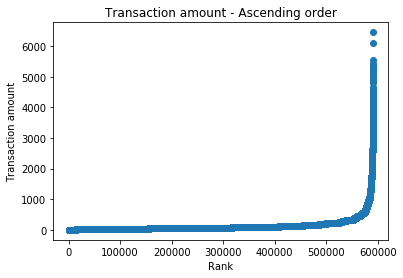

In [18]:
train=train.loc[train.TransactionAmt<31937.391,]
plt.scatter(list(range(train.shape[0])),train.sort_values('TransactionAmt').TransactionAmt)
plt.title('Transaction amount - Ascending order')
plt.xlabel('Rank')
plt.ylabel('Transaction amount')

W    439668
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


Text(0, 0.5, 'Fraud rate')

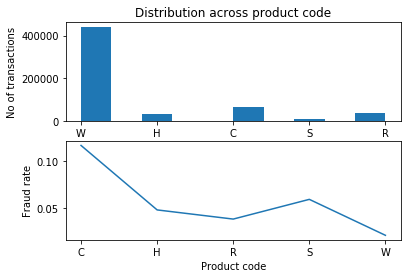

In [19]:
print(train.ProductCD.value_counts())
fig,ax=plt.subplots(2)
ax[0].hist(train.ProductCD)
ax[0].set_title('Distribution across product code')
plt.xlabel('Product code')
ax[0].set_ylabel('No of transactions')

ax[1].plot(train.groupby('ProductCD')['isFraud'].mean())
ax[1].set_ylabel('Fraud rate')

In [20]:
# Total number of cards in the dataset
train.card1.nunique()

13553

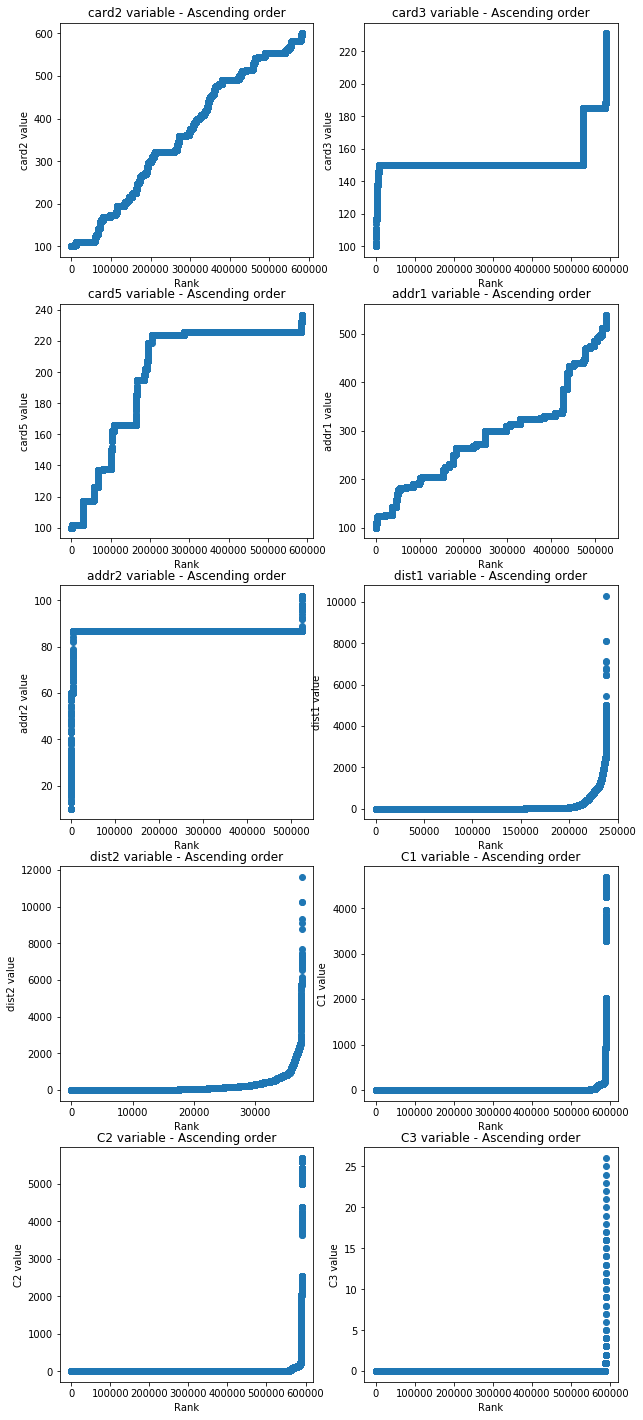

In [21]:
#card2,3,5 addr1,2, dist1,2 c1,2,3
cols=['card2','card3','card5','addr1','addr2','dist1','dist2','C1','C2','C3']
fig,ax=plt.subplots(5,2, figsize=(10,25))
#ax[0,0].plot(list(range(train.shape[0])),train.sort_values(cols[0]).loc[:,cols[0]])
cnt=0
for i in range(5):
    for j in range(2):
        ax[i,j].scatter(list(range(train.shape[0])),train.sort_values(cols[cnt]).loc[:,cols[cnt]])
        ax[i,j].set_title(f'{cols[cnt]} variable - Ascending order')
        ax[i,j].set_xlabel('Rank')
        ax[i,j].set_ylabel(f'{cols[cnt]} value')
        cnt+=1

In [22]:
train.loc[:,cols].describe()
# card2 variable distribution
#print(train.card2.describe())
#plt.scatter(list(range(train.shape[0])),train.sort_values('card2').card2)
#plt.title('card2 variable - Ascending order')
#plt.xlabel('Rank')
#plt.ylabel('card2 value')

,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3
count,581605.000000,588973.000000,586279.000000,524832.000000,524832.000000,238267.000000,37627.000000,590538.000000,590538.000000,590538.000000
mean,362.554968,153.194936,199.279229,290.734121,86.800630,118.502948,231.855423,14.092502,15.269779,0.005644
std,157.793268,11.336462,41.244132,101.741128,2.690629,371.873493,529.053494,133.569242,154.669159,0.150536
min,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,7.000000,1.000000,1.000000,0.000000
50%,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,37.000000,1.000000,1.000000,0.000000
75%,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,206.000000,3.000000,3.000000,0.000000
max,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,11623.000000,4685.000000,5691.000000,26.000000


In [23]:
print('C1 - ',np.quantile(train.C1,[0.8,0.95,0.99,0.999]))
print('C2 - ',np.quantile(train.C2,[0.8,0.95,0.99,0.999]))
print('C3 - ',np.quantile(train.C3,[0.8,0.95,0.99,0.999]))

C1 -  [   3.   22.  164. 1844.]
C2 -  [   4.   27.  154. 2358.]
C3 -  [0. 0. 0. 1.]


##### Looking at the distributions, we understand that applying logarithm on dist1 & dist2 variables would make them more linear and sclae down the extreme values - all the values less than 1 will be flagged as 0

##### Variables C1 & C2 will be capped at 99th percentile value as the median and means have significant differences caused by a few extreme values

##### All values greater than zero are marked 1 in variable C3 as more than 99 percent of the values are zero

In [24]:
# Modifying dist1
train.loc[train.dist1<1,'dist1']=1
train.dist1=np.log(train.dist1)

#dist2
train.loc[train.dist2<1,'dist2']=1
train.dist2=np.log(train.dist2)

#C1 & C2
train.loc[train.C1>np.quantile(train.C1,0.99),'C1']=np.quantile(train.C1,0.99)
train.loc[train.C2>np.quantile(train.C2,0.99),'C2']=np.quantile(train.C2,0.99)

#C3
train.loc[train.C3>0,'C3']=1

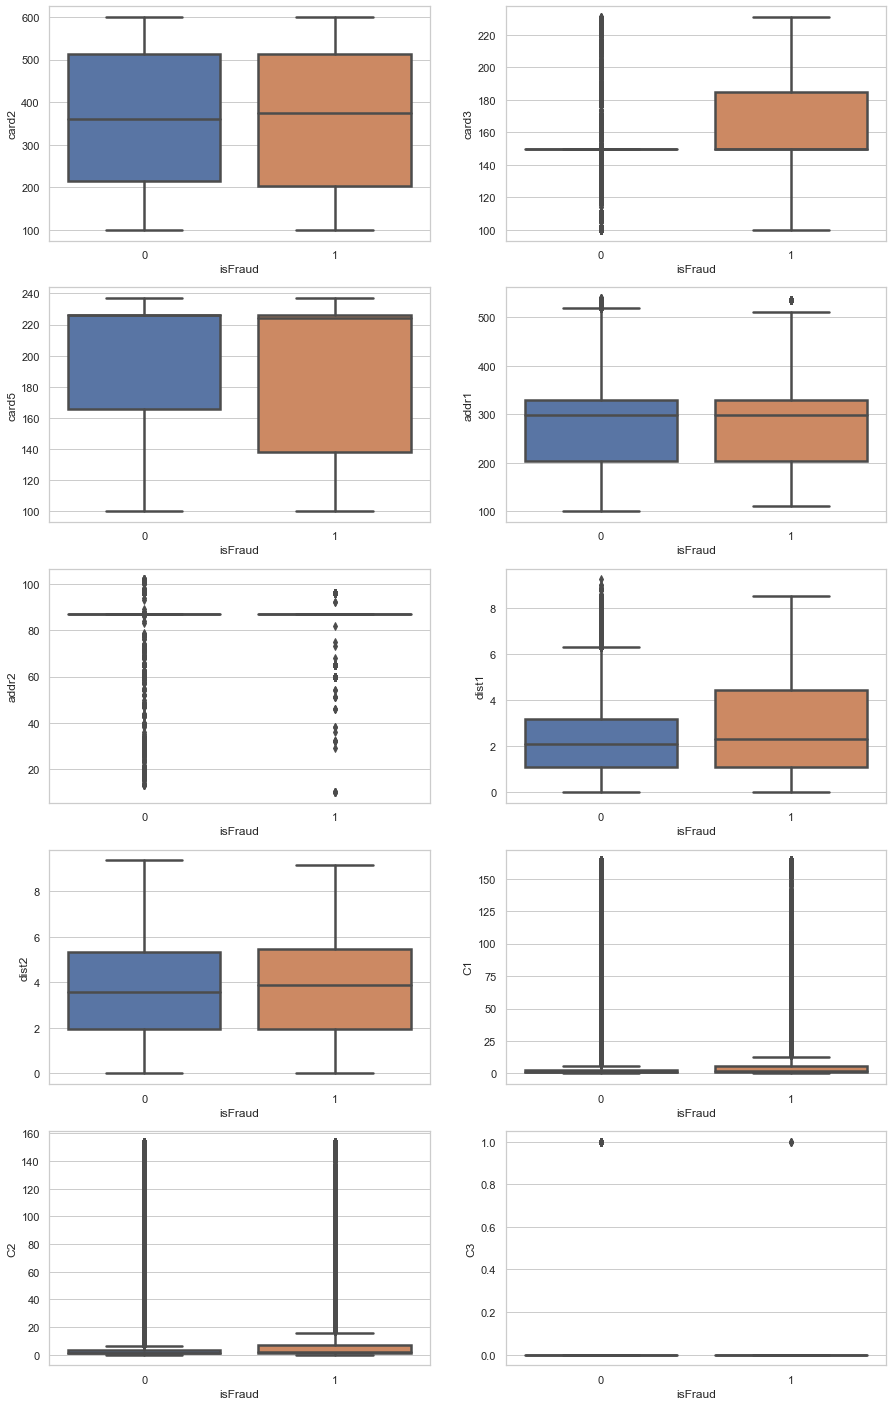

In [25]:
sns.set(style="whitegrid")
fig,ax=plt.subplots(5,2, figsize=(15,25))
for i,t in enumerate(cols):
    sns.boxplot(x="isFraud", y=train.loc[:,t], data=train, linewidth=2.5,ax=ax[i//2,i%2])

In [26]:
#train.boxplot(by='isFraud',column=['card2','card3'],layout=(2,1))
#train.boxplot(by='isFraud',column=['card2','card3'],grid=False)
train.iloc[:,0:20].fillna(train.iloc[:,0:20].median())

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3
0,2987000,0,86400,68.50,W,13926,361.0,150.0,discover,142.0,credit,315.0,87.0,2.944439,3.610918,NaN,NaN,1.0,1.0,0.0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,2.079442,3.610918,gmail.com,NaN,1.0,1.0,0.0
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,5.659482,3.610918,outlook.com,NaN,1.0,1.0,0.0
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,2.079442,3.610918,yahoo.com,NaN,2.0,5.0,0.0
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,2.079442,3.610918,gmail.com,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,361.0,150.0,visa,226.0,debit,272.0,87.0,3.871201,3.610918,NaN,NaN,2.0,1.0,0.0
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,2.079442,3.610918,gmail.com,NaN,1.0,1.0,0.0
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,2.079442,3.610918,gmail.com,NaN,1.0,1.0,0.0
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,1.098612,3.610918,aol.com,NaN,1.0,1.0,0.0


1) TransactionID, isFraud, TransactionDT, TransactionAmt, ProductCD, card1, c1,c2,c3 variables have no missing values.

2) We observe that the fraud rate in this dataset is 3.5%.

3) Transaction date has 573,349 unique values for 590,540 transactions. This shows that the transaction date is a timestamp

4) We observe that there is an outlier in TransactionAmt column. Also, the transactions with extremely high value are flagged as non-fraud. This could be a data error. Having such high values would cause problems while building models. Hence, removed these row

In [27]:
train.isnull().any().sum()

414

In [28]:
train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449553
id_37             449553
id_38             449553
DeviceType        449728
DeviceInfo        471872
Length: 434, dtype: int64

In [29]:
train.groupby(['card1'])['TransactionAmt'].transform('mean')

0         351.931163
1         234.292753
2          97.015542
3         123.416340
4          96.972222
             ...    
590535     96.995799
590536    242.041667
590537    119.741362
590538    122.763623
590539    209.861345
Name: TransactionAmt, Length: 590538, dtype: float64

In [1]:
train.to_excel("Desktop/Python%20Project%20/")

NameError: name 'train' is not defined

In [2]:
train.to_excel("Desktop/Python%20Project%20/trainPythonFile.xlsx")

NameError: name 'train' is not defined

In [3]:
train

NameError: name 'train' is not defined